In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from LeukemiaNet import LeukemiaNet_Features_Resnet, LeukemiaClassifier, draw_confusion_matrix, print_model_report

c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Using cache found in C:\Users\micha/.cache\torch\hub\pytorch_vision_v0.10.0


In [2]:
classifier = LeukemiaClassifier()
feature_extractor = LeukemiaNet_Features_Resnet()
classifier.load_state_dict(torch.load("Classifier_tuned.pt"))
feature_extractor.load_state_dict(torch.load("FeatureExtractor_tuned.pt"))
classifier.eval()
feature_extractor.eval()

LeukemiaNet_Features_Resnet(
  (embeddings): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [3]:
images = datasets.ImageFolder('./Testing_Images/', transform=transforms.ToTensor())
test_loader = DataLoader(images, batch_size=1, shuffle=True)

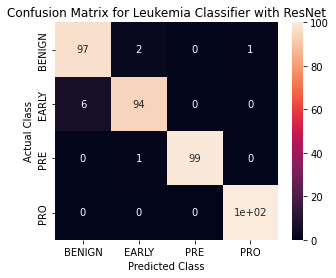

              precision    recall  f1-score   support

      BENIGN       0.94      0.97      0.96       100
       EARLY       0.97      0.94      0.95       100
         PRE       1.00      0.99      0.99       100
         PRO       0.99      1.00      1.00       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



In [20]:
predicted_labels = np.array([])
actual_labels = np.array([])
with torch.no_grad():
    for x, y in test_loader:
        predicted_labels = np.append(predicted_labels, classifier(feature_extractor(x)).argmax(dim=1).numpy())
        actual_labels = np.append(actual_labels, y.numpy())
class_names = ['BENIGN','EARLY', 'PRE', 'PRO']
draw_confusion_matrix(predicted_labels, actual_labels)
print_model_report(predicted_labels, actual_labels, class_names)